# ***Developing a Neural Network that can read Handwritting***

Performer - **Naman Sahu**

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

# Splitting the Data set

In [37]:
(train_img, train_label) , (test_img, test_label) = datasets.mnist.load_data()

In [38]:
print(train_img.shape)
print(train_label.shape)
print(test_img.shape)
print(test_label.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [39]:
train_img,test_img= train_img/255.0,test_img/255.0
len(train_img)

60000

# Visualisation of Image

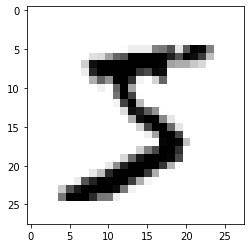

In [40]:
plt.imshow(train_img[0], cmap=plt.cm.gray_r , interpolation='nearest')

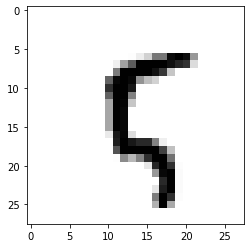

In [41]:
plt.imshow(train_img[100], cmap=plt.cm.gray_r , interpolation='nearest')

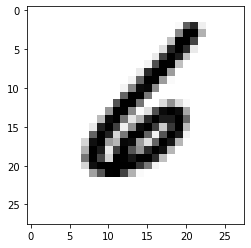

In [42]:
plt.imshow(train_img[999], cmap=plt.cm.gray_r , interpolation='nearest')

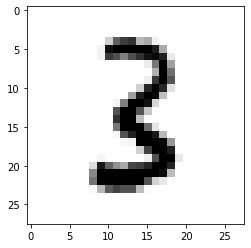

In [43]:
plt.imshow(train_img[50000], cmap=plt.cm.gray_r , interpolation='nearest')

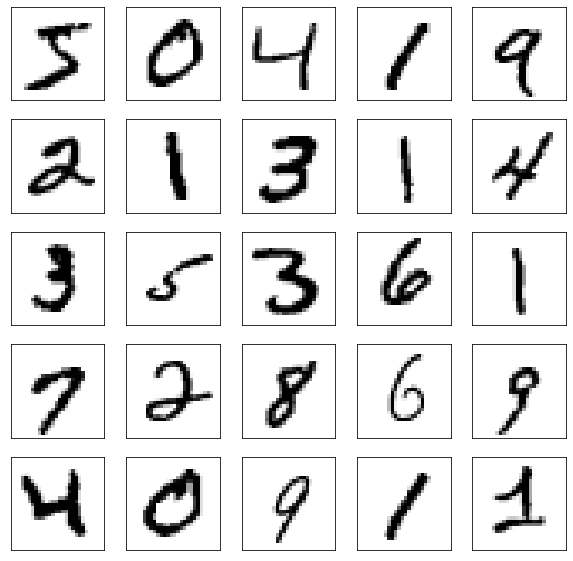

In [44]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap = plt.cm.binary)
plt.show()

# Data Processing

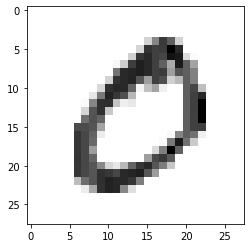

In [45]:
train_img = keras.utils.normalize(train_img, axis=1)
test_img = keras.utils.normalize(test_img, axis=1)
plt.imshow(train_img[1], cmap = plt.cm.binary)
plt.show()

In [46]:
train_img = np.array(train_img).reshape(-1,28,28,1)
print("Dimension of Trainset:" , train_img.shape)
test_img = np.array(test_img).reshape(-1,28,28,1)
print("Dimension of Testset:" , test_img.shape)

Dimension of Trainset: (60000, 28, 28, 1)
Dimension of Testset: (10000, 28, 28, 1)


# Creating CNN Model

In [47]:
mdl = Sequential()

mdl.add(Conv2D(64,(3,3), input_shape = train_img.shape[1:]))
mdl.add(Activation('relu'))
mdl.add(MaxPooling2D(pool_size = (2,2)))

mdl.add(Conv2D(64,(3,3)))
mdl.add(Activation('relu'))
mdl.add(MaxPooling2D(pool_size = (2,2)))

mdl.add(Conv2D(64,(3,3)))
mdl.add(Activation('relu'))
mdl.add(MaxPooling2D(pool_size = (2,2)))

mdl.add(Flatten())
mdl.add(Dense(64))
mdl.add(Activation('relu'))

mdl.add(Dense(64))
mdl.add(Activation('relu'))

mdl.add(Dense(64))
mdl.add(Activation('softmax'))

In [48]:
mdl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

# Creating and Training the Model

In [49]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [50]:
model.compile(
       optimizer= tf.keras.optimizers.Adam(0.001),
       loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
       metrics = [tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [51]:
model.fit(
       train_img, train_label,
       epochs = 10,
       validation_data = (test_img, test_label)
)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3160 - sparse_categorical_accuracy: 0.9116 - val_loss: 0.1870 - val_sparse_categorical_accuracy: 0.9444
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1417 - sparse_categorical_accuracy: 0.9584 - val_loss: 0.1229 - val_sparse_categorical_accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0978 - sparse_categorical_accuracy: 0.9711 - val_loss: 0.1028 - val_sparse_categorical_accuracy: 0.9686
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0729 - sparse_categorical_accuracy: 0.9783 - val_loss: 0.0910 - val_sparse_categorical_accuracy: 0.9721
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0558 - sparse_categorical_accuracy: 0.9837 - val_loss: 0.0861 - val_sparse_categorical_accuracy: 0.9731
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0444 - spars

**Lets Evaluate the Model**

In [52]:
test_loss, test_acc = model.evaluate(test_img,test_label)
print("Test Accuracy On samples:",test_acc)
print("Test Loss on Samples: ",test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0916 - sparse_categorical_accuracy: 0.9738
Test Accuracy On samples: 0.973800003528595
Test Loss on Samples:  0.09164175391197205


**Lets Test the model with an Image**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


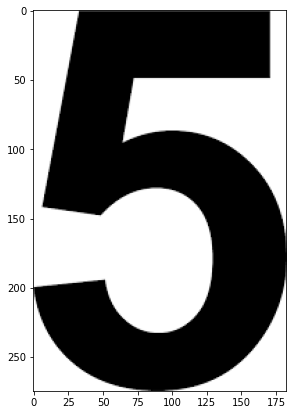

In [53]:
from google.colab import drive
drive.mount('/content/drive')
plt.figure(figsize=(7,7))
img = cv2.imread("/content/drive/MyDrive/data/myimage.png")
plt.imshow(img)
plt.show()

In [54]:
img = cv2.resize((cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)),(28,28), interpolation = cv2.INTER_AREA)

In [55]:
img.shape

(28, 28)

In [56]:
image = keras.utils.normalize(img, axis = 1)
image = np.array(image).reshape(-1,28,28,1)
image.shape

(1, 28, 28, 1)

In [57]:
print("Number predicted from the Image :")
print(np.argmax(model.predict(image)))

Number predicted from the Image :
5


# Using CNN Deep Learning Model, we were able to predict the number in the image exactly

# **End of Task**